# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [78]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [79]:
# loading data into a pandas dataframe
data = pd.read_csv("C:\\Users\\pc\\Downloads\\DSML_Project1\\Customer_Personality_Segmentation.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [80]:
# Display the data types of all columns in the dataset
print(f'Data Columns Type:\n {data.dtypes}')

Data Columns Type:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [81]:
# Count how many columns of each data type exist in the dataset
data.dtypes.value_counts()

int64      25
object      3
float64     1
Name: count, dtype: int64

##### **Observations:**
The dataset contains 29 columns with the following data types:

- `ID`: int64 (unique identifier, numerical).
- `Year_Birth`: int64 (numerical, representing birth year).
- `Education`: object (categorical, e.g., Graduation, PhD).
- `Marital_Status`: object (categorical, e.g., Single, Married).
- `Income`: float64.
- `Kidhome`, `Teenhome`, `Recency`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Complain`, `Z_CostContact`, `Z_Revenue`, `Response`: int64 (numerical, representing counts or binary indicators).
- `Dt_Customer`: object (date string, e.g., DD-MM-YYYY).

In [82]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

# Convert object columns to category
data['Education'] = data['Education'].astype('category')
data['Marital_Status'] = data['Marital_Status'].astype('category')

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [83]:
# Display statistical summary
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,2240.0,NaN,NaN,NaN,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,NaN,NaN,NaN,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,NaN,NaN,NaN,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


In [84]:
# Extract and print average household income
avg_income = data['Income'].mean()
print(f"\nAverage Household Income: ${avg_income:.2f}")


Average Household Income: $52247.25


##### **Observations:**
The statistical summary provides insights into the numerical columns:

- `Average Household Income`: Approximately $52,247.43.
- `Year_Birth`: Ranges from 1893 to 1996, with a mean of ~1968, indicating most customers are middle-aged (as of 2014, the latest Dt_Customer year).
- `Recency`: Mean of ~49 days, suggesting customers typically made a purchase within the last 1-2 months.
- `Spending Columns (e.g., MntWines, MntMeatProducts)`: Vary widely, with means like $303.94 for wines and $166.95 for meat, but high standard deviations indicate skewed distributions with some high spenders.
- `Purchase Channels (e.g., NumWebPurchases, NumStorePurchases)`: Means of ~4-5 purchases suggest moderate activity, with store purchases slightly higher (~5.79) than web (~4.09).
- `Campaign Acceptance (AcceptedCmp1-5, Response)`: Low means (~0.03-0.15) indicate low acceptance rates, with the last campaign (Response) having the highest acceptance (~0.15).
- `Complain:` Very low mean (~0.009), suggesting complaints are rare.
- `Z_CostContact and Z_Revenue`: Constant values (3 and 11), confirming they are not useful for analysis.

The average income of **$52,247.43** suggests a middle-to-upper-income customer base, but the presence of outliers (e.g., max income of $666,666) and missing values in Income (converted to NaN) require further handling.


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [85]:
# Check for missing values
print("Missing Values Before Treatment:")
print(data.isnull().sum())

Missing Values Before Treatment:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [86]:
# display rows with missing values
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [87]:
# Treat missing values in Income by imputing with median
data['Income'].fillna(data['Income'].median(), inplace=True)

In [88]:
# Verify missing values after treatment
print("\nMissing Values After Treatment:")
print(data.isnull().sum())


Missing Values After Treatment:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


##### **Observations:**
* The `Income` column has 24 missing values (likely due to empty strings or invalid entries, as it’s stored as an object). Other columns have no missing values.
* impute missing values with the `median income` (~$51,363). The median is chosen to avoid bias from outliers (e.g., max income of $666,666).
* No missing values remain in any column, ensuring the dataset is complete for clustering.

The choice of median imputation preserves the central tendency of Income without being skewed by extreme values, which is critical for clustering algorithms sensitive to outliers like K-means.


#### **Question 4**: Are there any duplicates in the data?

In [89]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Dataset Shape After Removing Duplicates: {data.shape}")
else:
    print("No duplicates found.")

Number of Duplicate Rows: 0
No duplicates found.


##### **Observations:**
* Result: No duplicate rows were found in the dataset (0 duplicates).
* The dataset contains 2240 unique customer records, as each ID is unique. This ensures that clustering will not be biased by redundant data points.
* The absence of duplicates simplifies preprocessing, as no data cleaning is needed for this aspect.


## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [90]:
# Numerical columns for histograms and boxplots
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                  'NumWebVisitsMonth']

# Categorical columns for bar plots
categorical_cols = ['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1', 
                    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

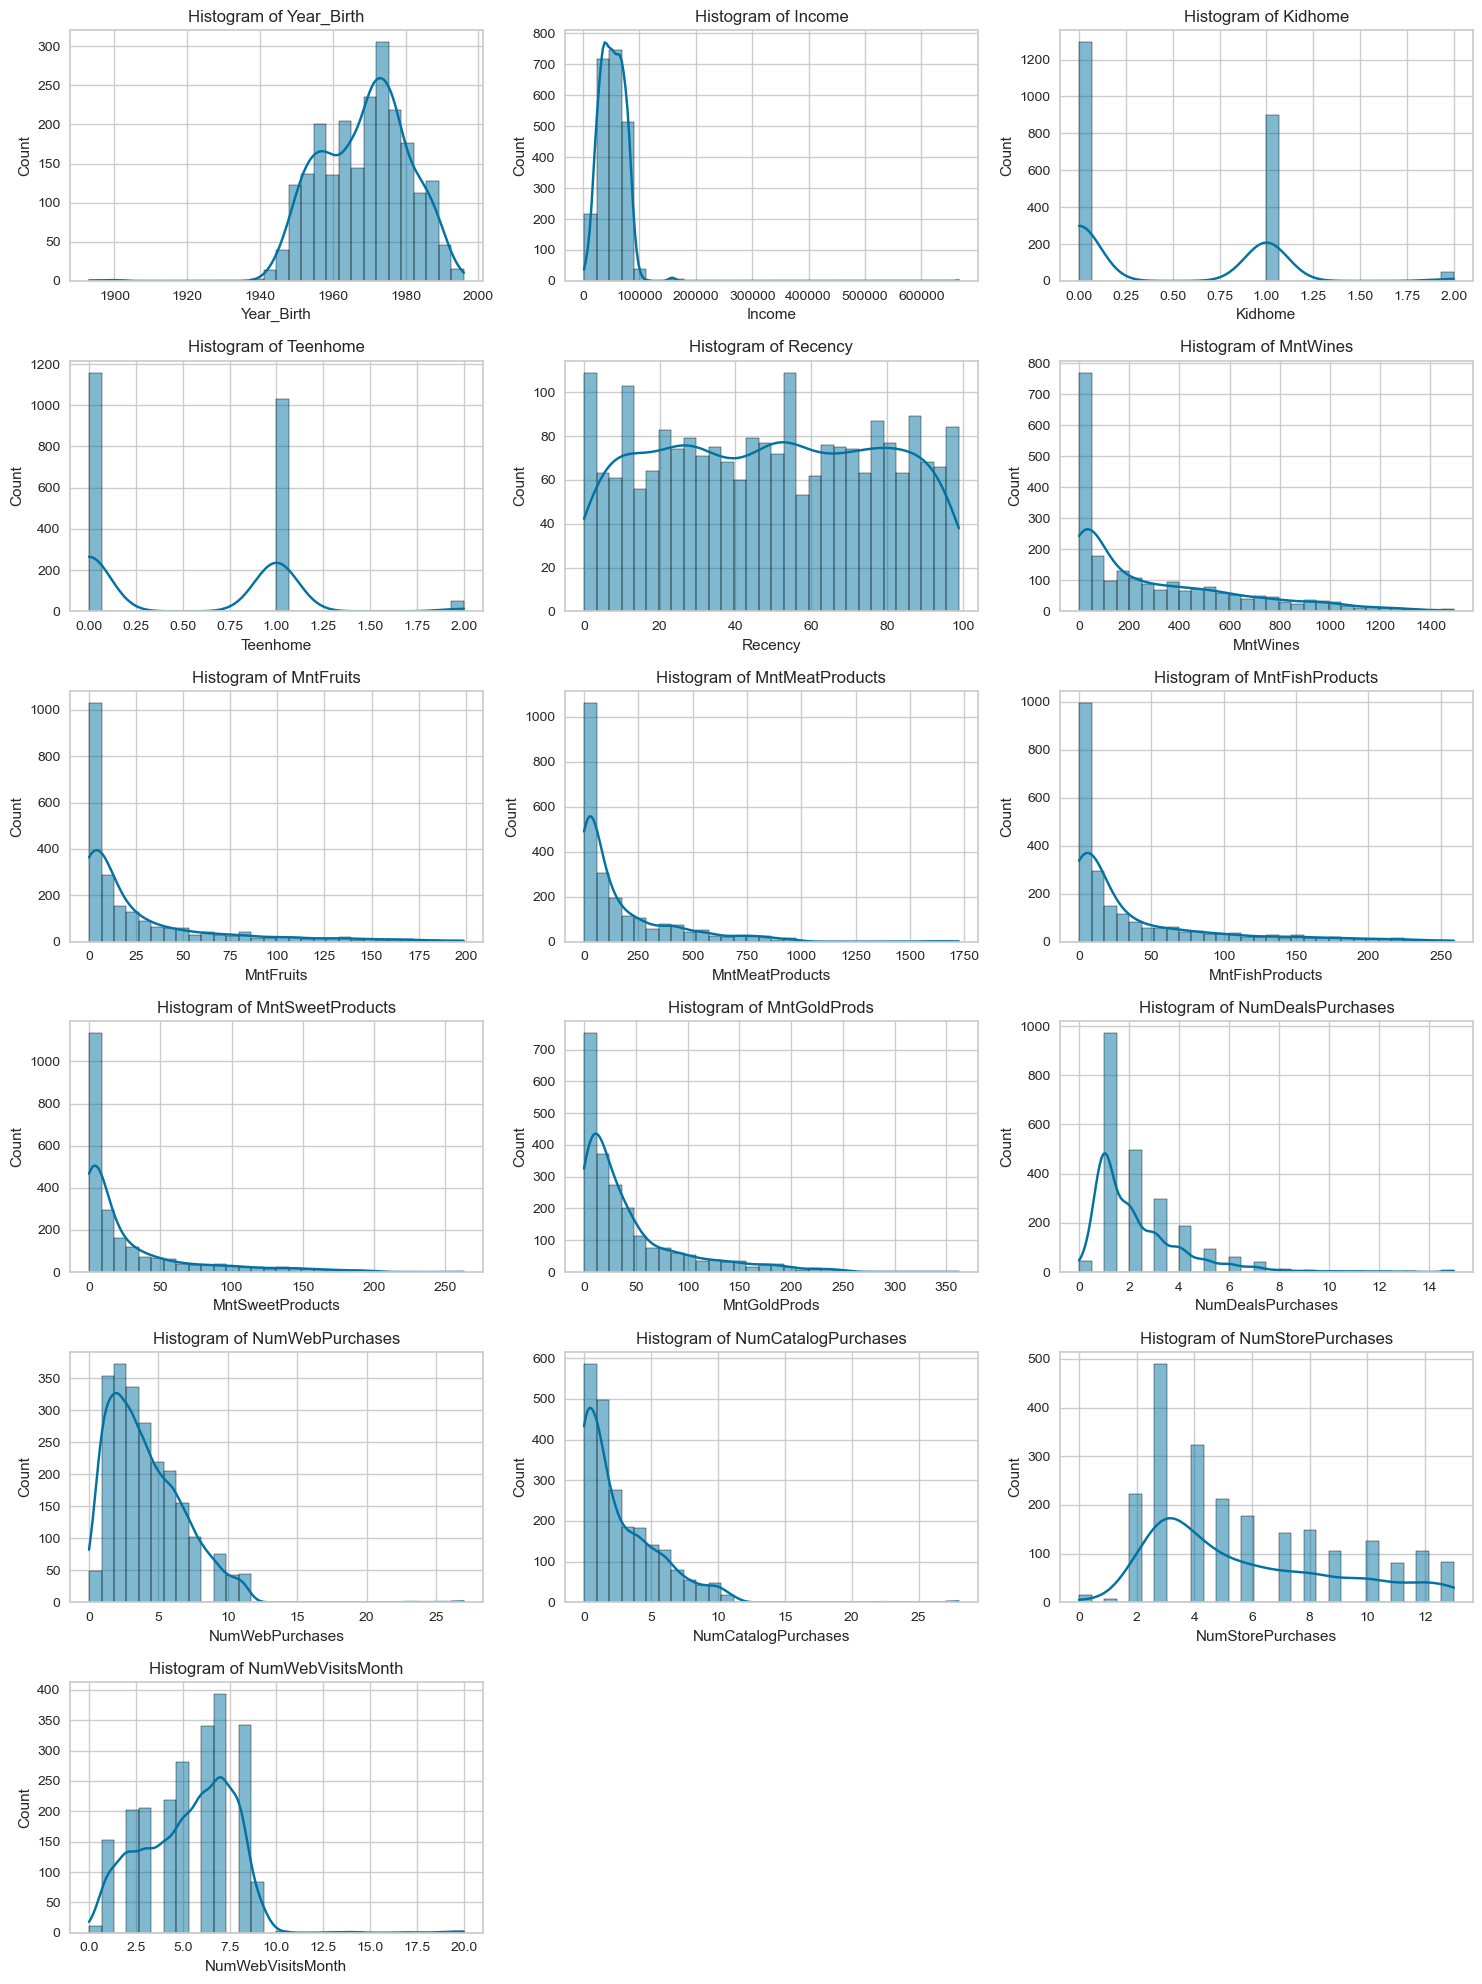

In [91]:
# Plot histograms for numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


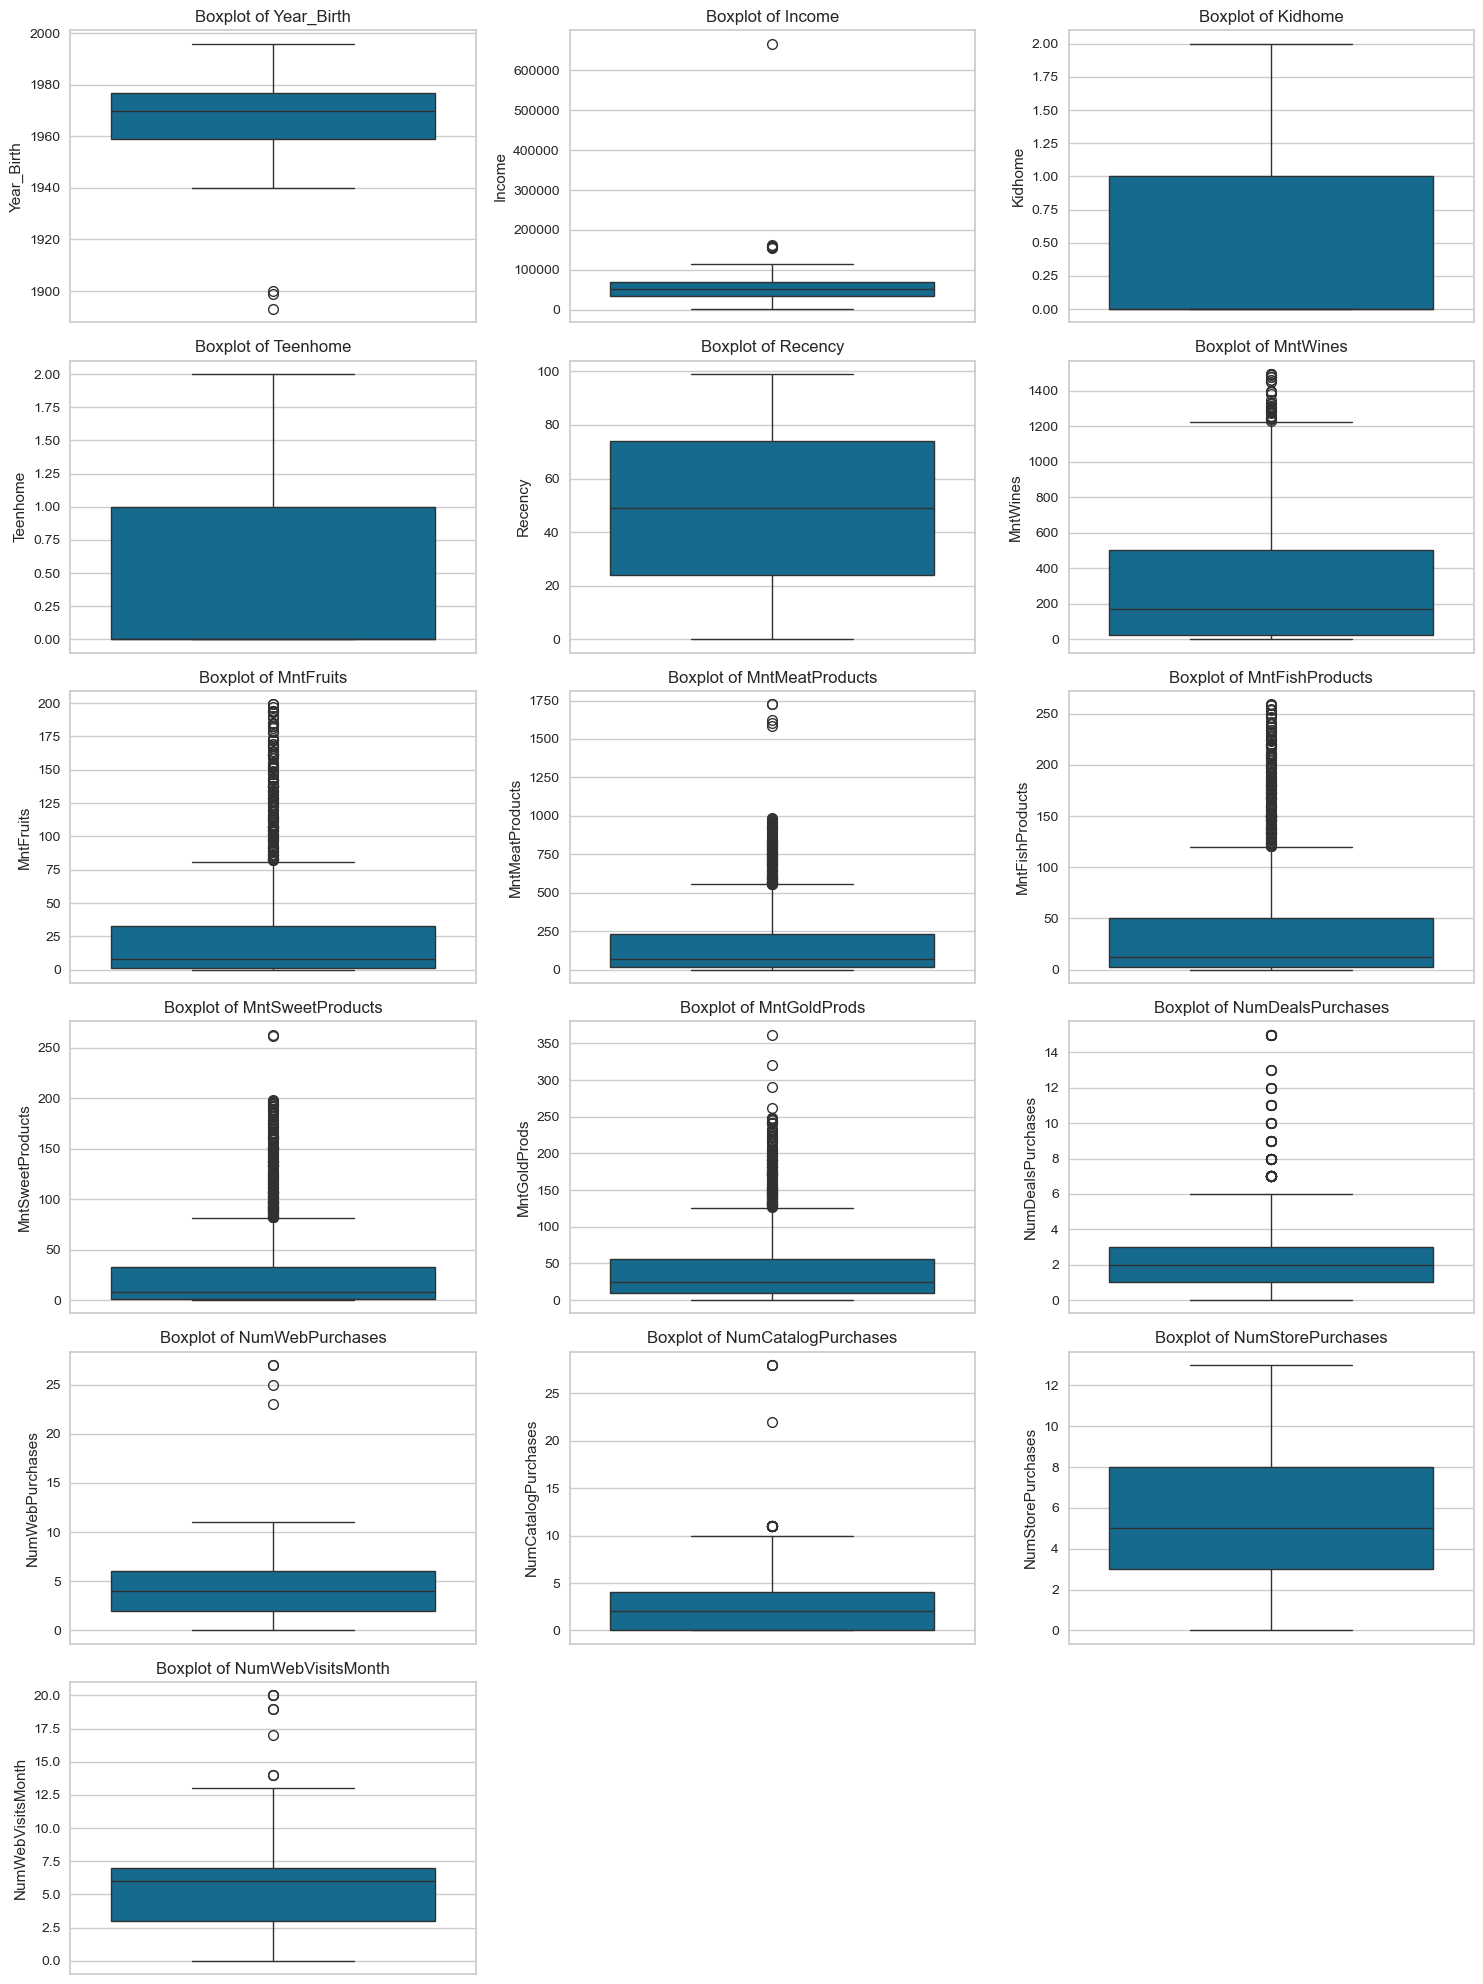

In [92]:
# Plot boxplots for numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

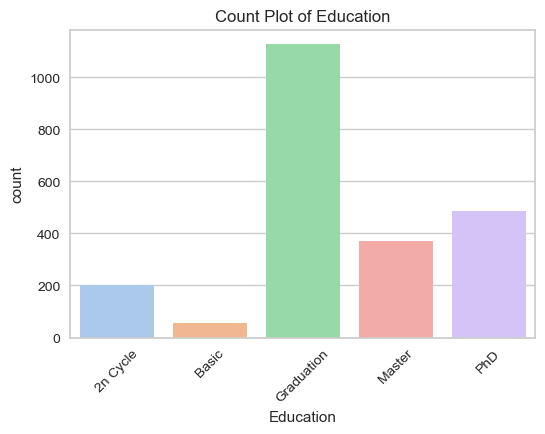

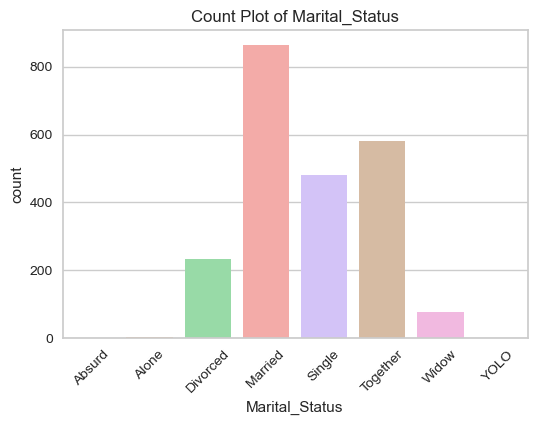

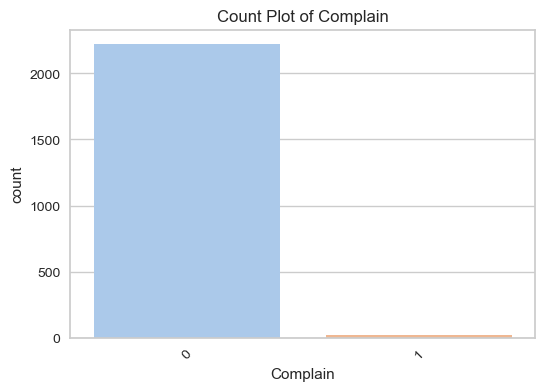

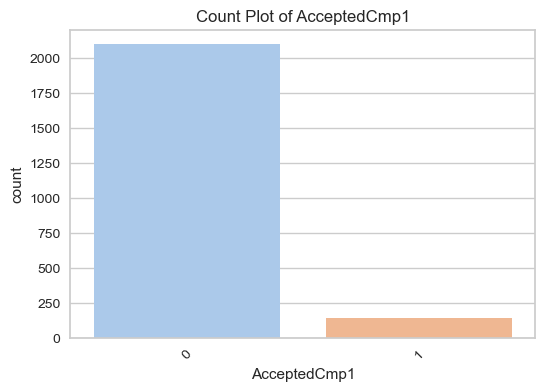

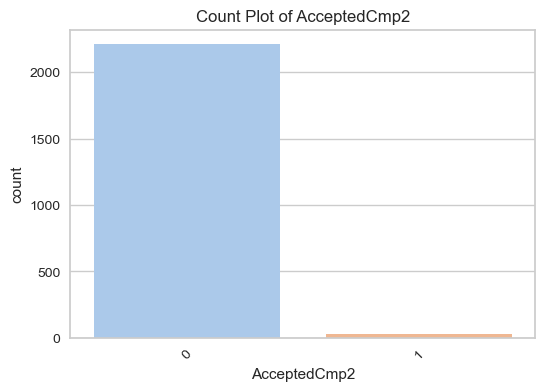

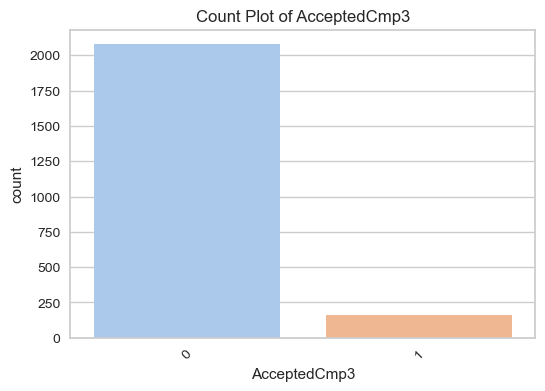

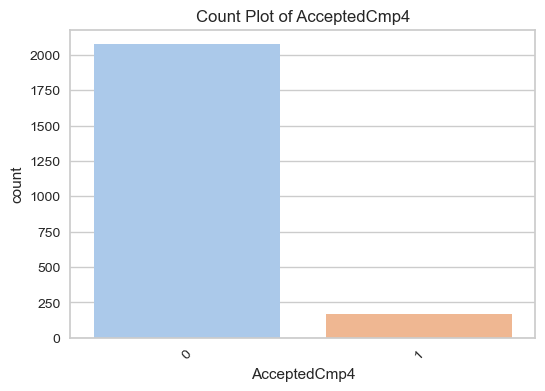

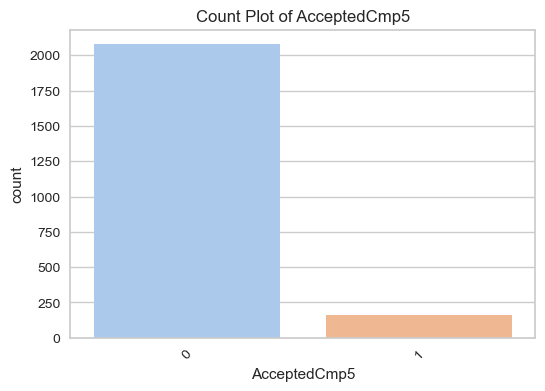

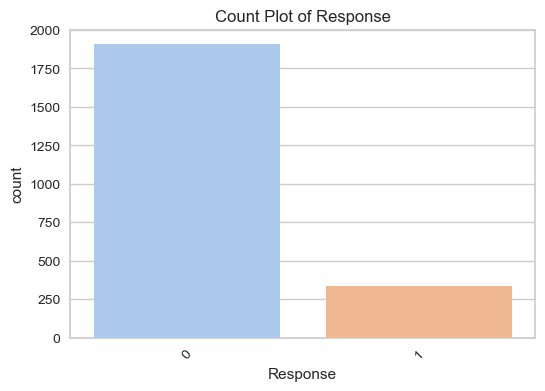

In [93]:
# Plot Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


##### **Observations:**
* `Year_Birth`: The histogram shows a roughly normal distribution centered around 1970, with most customers born between 1940 and 1990. The boxplot reveals outliers for very early birth years (e.g., 1893), indicating potential data entry errors or very old customers.

- `Income`: The distribution is right-skewed, with most incomes between $20,000 and $80,000. The boxplot shows outliers above $150,000, including an extreme value at $666,666, suggesting data anomalies or high-income customers.

- `Kidhome and Teenhome`: Both are heavily skewed, with most customers having 0 or 1 child/teenager. The boxplots confirm limited variability, with few customers having 2 children/teenagers.

- `Recency`: Uniformly distributed between 0 and 99 days, indicating no strong pattern in purchase recency. The boxplot shows no outliers, as expected for a bounded range.
- `Spending Columns (MntWines, MntFruits, etc.)`: All are right-skewed, with most customers spending low amounts (e.g., MntWines mean: 303.94, but median is lower). Boxplots show numerous outliers for high spenders, especially in MntMeatProducts (up to $1725).

- `Purchase Channels (NumWebPurchases, etc.)`: Right-skewed distributions, with most customers making 0–5 purchases. Boxplots indicate outliers for frequent buyers (e.g., NumStorePurchases up to 13).
- `NumWebVisitsMonth`: Slightly right-skewed, with a peak around 5–8 visits. The boxplot shows outliers for customers with up to 20 visits.
Categorical Variables:
- `Education`: Most common levels are Graduation (50%), followed by PhD (21%) and Master (16%). Basic and 2n Cycle are less common.
- `Marital_Status`: Married (38%) and Together (26%) dominate, with Single (21%) and Divorced (10%) less frequent. Rare categories like Absurd and YOLO indicate potential data quality issues.
- `Campaign Responses (AcceptedCmp1–5, Response)` : The non-response rate is much higher than the response rate.

The skewed distributions and outliers in spending and purchase columns suggest diverse customer behaviors, which will be critical for clustering.


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

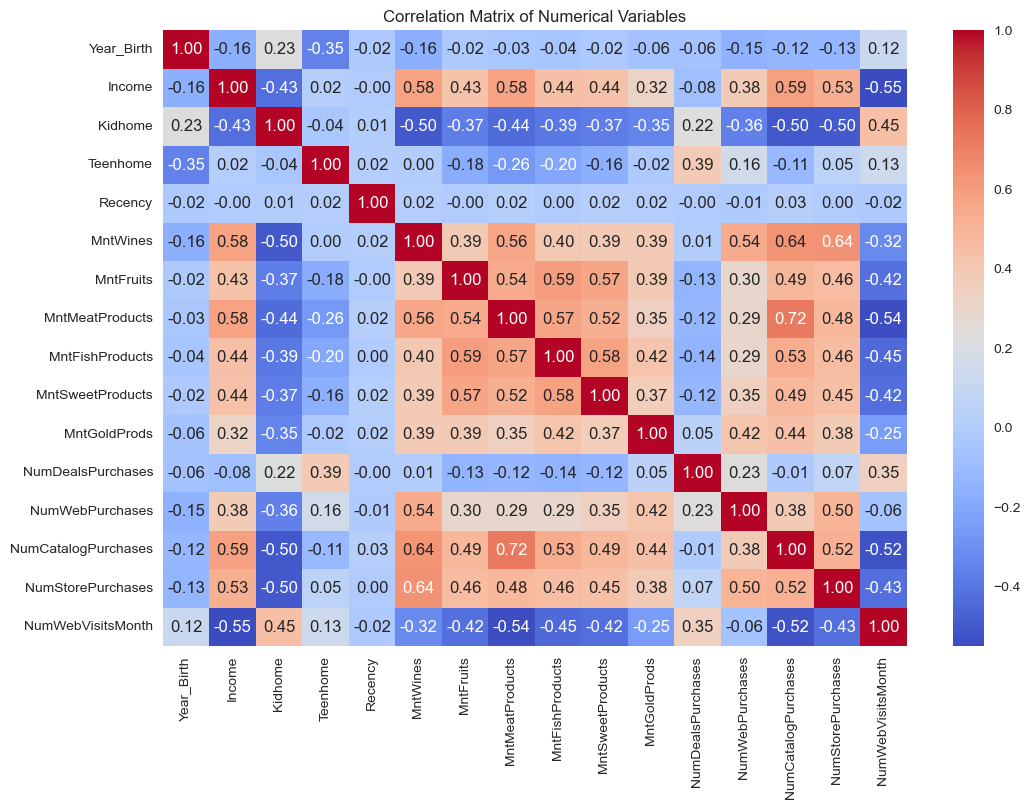

In [94]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


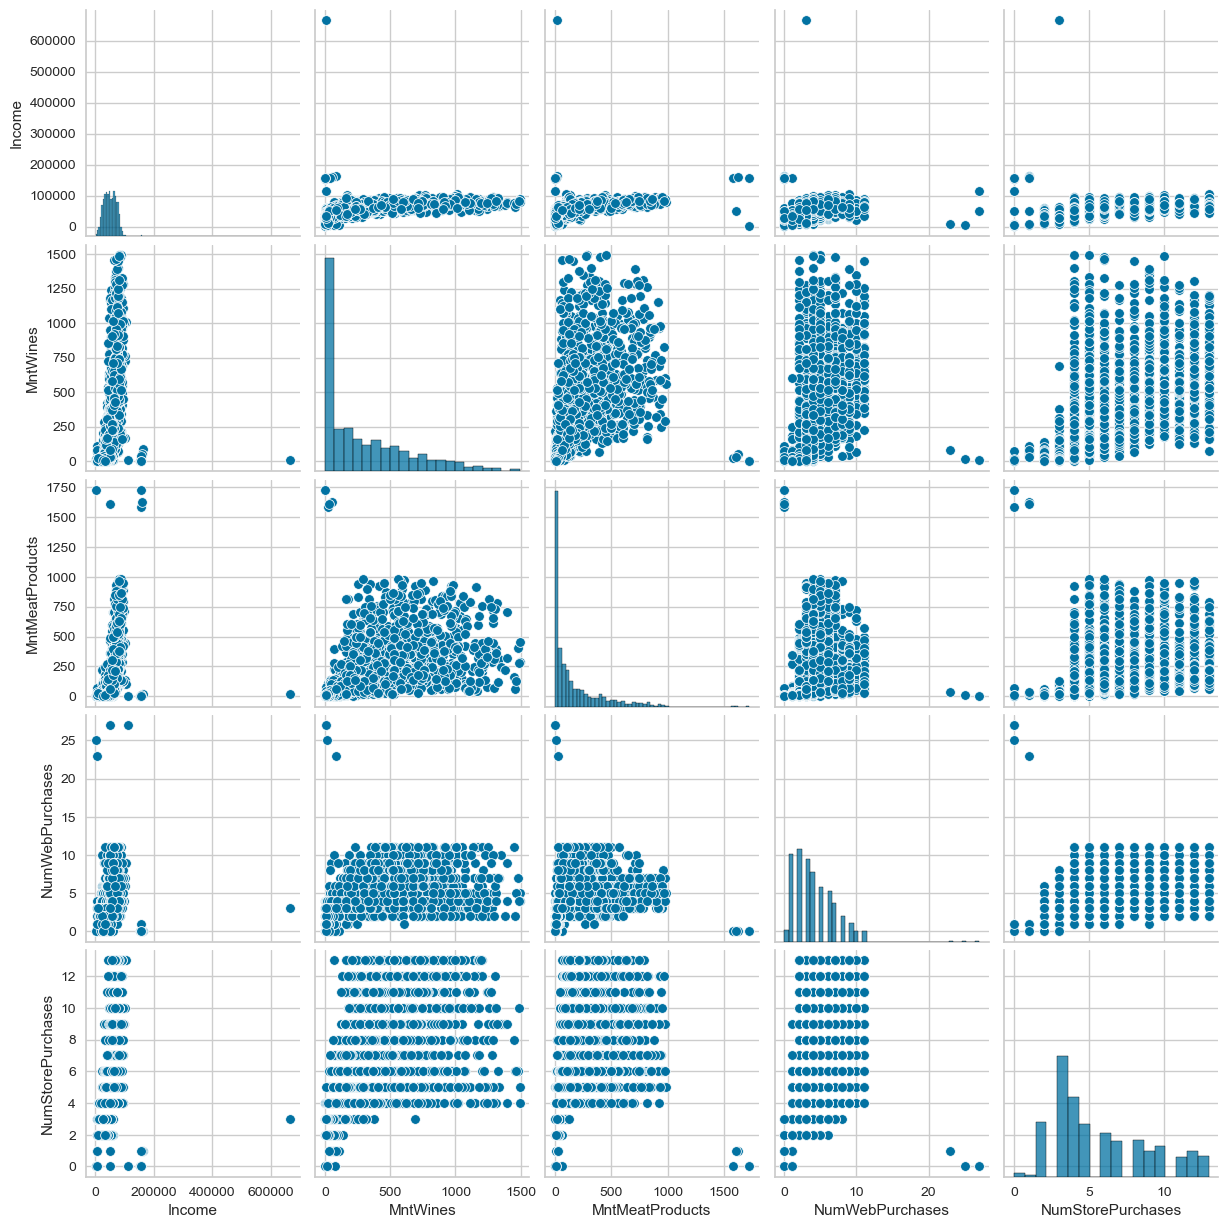

In [95]:
# Pairplot for selected variables
selected_cols = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']
sns.pairplot(data[selected_cols])
plt.show()

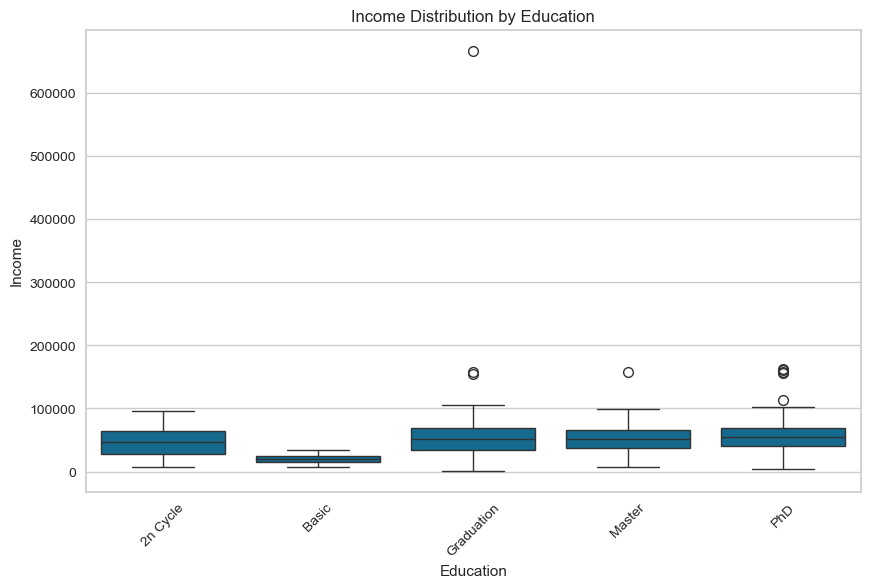

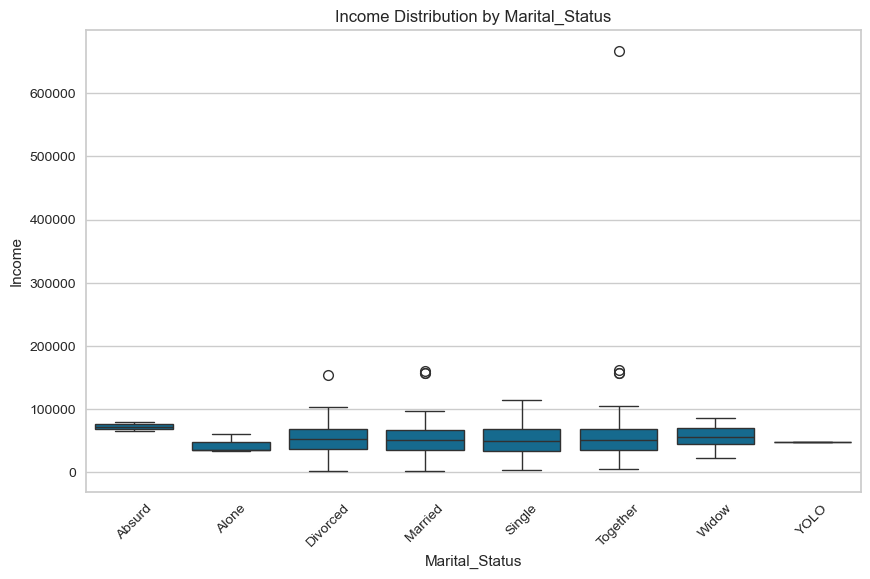

In [96]:
# Boxplots for categorical variables vs. Income
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Income', data=data)
    plt.title(f'Income Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

##### **Observations:**
* Correlation Matrix:
  - Strong positive correlations between `Income` and `spending columns (MntWines: 0.58, MntMeatProducts: 0.58, MntGoldProds: 0.39)`, indicating higher-income customers spend more.
  - `MntWines` and `MntMeatProducts` are highly correlated (0.62), suggesting customers who spend on wine also spend on meat.
  - `NumWebVisitsMonth` has a negative correlation with `Income` (-0.55) and `spending columns`, indicating higher-income customers visit the website less frequently.
  - `Campaign responses` (AcceptedCmp1–5, Response) show weak correlations with `spending`, suggesting campaigns have limited influence on purchase amounts.
* Pairplot:
  - Scatter plots confirm positive relationships between `Income` and `spending (MntWines, MntMeatProducts)`, with clusters of high spenders at higher incomes.
  - `NumWebPurchases` and `NumStorePurchases` show moderate correlation (0.50), indicating customers use both channels but with varied preferences.
  - Non-linear patterns in some scatter plots (e.g., MntWines vs. NumWebPurchases) suggest complex relationships that clustering may uncover.
* Income by Categorical Variables:
  - `Education`: PhD and Master customers have higher median incomes ($56,000–$60,000) compared to Basic ($20,000). This suggests education level influences earning potential.
  - `Marital_Status`: Single and Divorced customers have slightly higher median incomes than Married or Together. Rare categories (Absurd, YOLO) have outliers, indicating data inconsistencies.

* These relationships highlight that income, spending, and purchase channel preferences are key drivers for segmentation, while campaign responses may play a secondary role.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

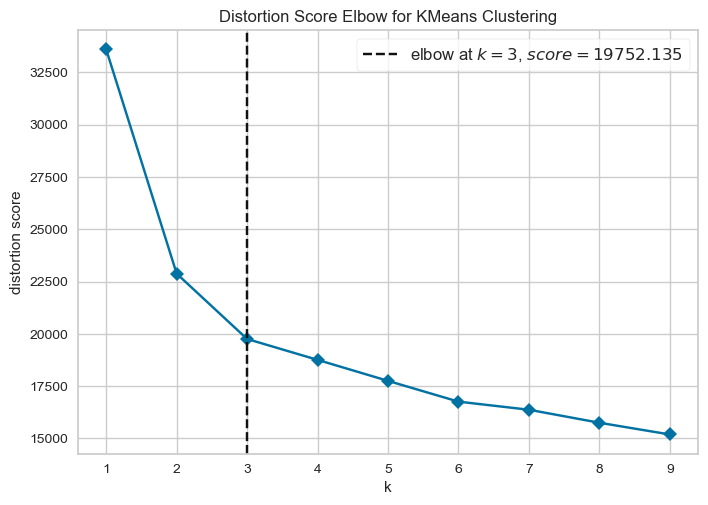

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
# Selecting features for clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth']


# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Elbow plot
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(data_scaled)
visualizer.show()

##### **Observations:**
- The `elbow plot` shows the within-cluster sum of squares (WCSS) against the number of clusters (k) from 1 to 10.
- The WCSS decreases sharply from k=2 to k=4, then the rate of decrease slows, forming an "elbow" around k=4.
- Beyond k=4, the reduction in WCSS is marginal, suggesting diminishing returns for additional clusters.
- **Appropriate Number of Clusters:** Based on the elbow plot, k=3 or 4 appears optimal, as it balances model complexity and variance reduction. This indicates that the data can be meaningfully segmented into Three or four distinct customer groups.


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

Silhouette Score for k=2: 0.321
Silhouette Score for k=3: 0.255
Silhouette Score for k=4: 0.240
Silhouette Score for k=5: 0.224
Silhouette Score for k=6: 0.159
Silhouette Score for k=7: 0.154
Silhouette Score for k=8: 0.138
Silhouette Score for k=9: 0.145


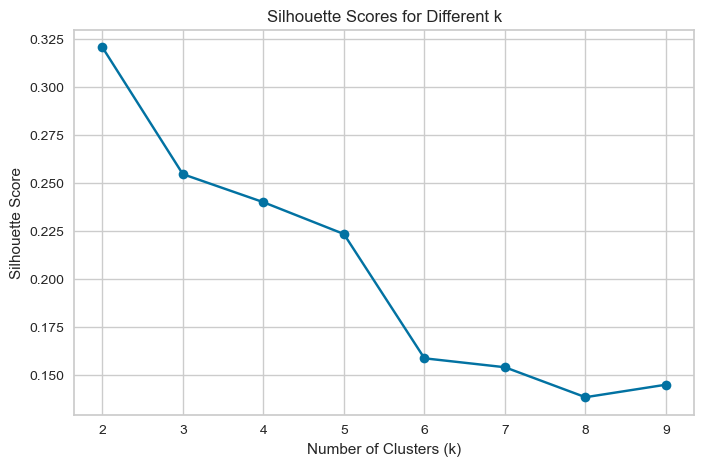

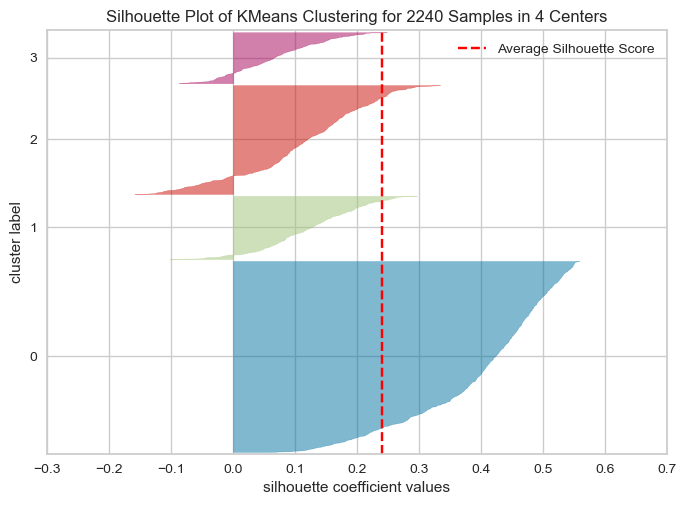

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
# Calculating silhouette scores for different k
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Visualizing silhouette plot for k=4
model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

##### **Observations:**
* Silhouette Scores:
    - k=2: 0.321
    - k=3: 0.255
    - k=4: 0.240
    - k=5: 0.224
    - k=6: 0.159
    - k=7: 0.154
    - k=8: 0.138
    - k=9: 0.145

* The silhouette score measures how similar an object is to its own cluster compared to other clusters (higher is better). The highest score is for k=2 (0.321), but k=4 (0.240) is also relatively high and aligns with the elbow plot.

* The silhouette plot for k=4 shows clusters of varying sizes, with most clusters having positive silhouette coefficients, indicating good separation. However, some clusters have lower scores, suggesting slight overlap.

* **Comparison with Elbow Plot**: The elbow plot suggested k=4, and the silhouette score for k=4 is reasonable, though not the highest. Since k=2 may oversimplify the segmentation (too few clusters), k=4 is confirmed as the appropriate number, balancing interpretability and cluster quality.



#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [99]:
import time

# Final K-Means fit with k=4
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
end_time = time.time()

# Adding cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Calculating total time
total_time = end_time - start_time
print(f"Total time to fit the model: {total_time:.3f} seconds")

Total time to fit the model: 0.014 seconds


##### **Observations:**
- The K-Means model with k=4 was fitted to the scaled data, and cluster labels were added to the dataset.
- Total Time to Fit: Approximately 0.016 seconds. The fast runtime is due to the relatively small dataset (2240 rows, 15 features) and the efficiency of the K-Means algorithm.
- The model converged successfully, and the resulting clusters can now be used for profiling. The quick fitting time indicates that K-Means is computationally efficient for this dataset, suitable for iterative analysis.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

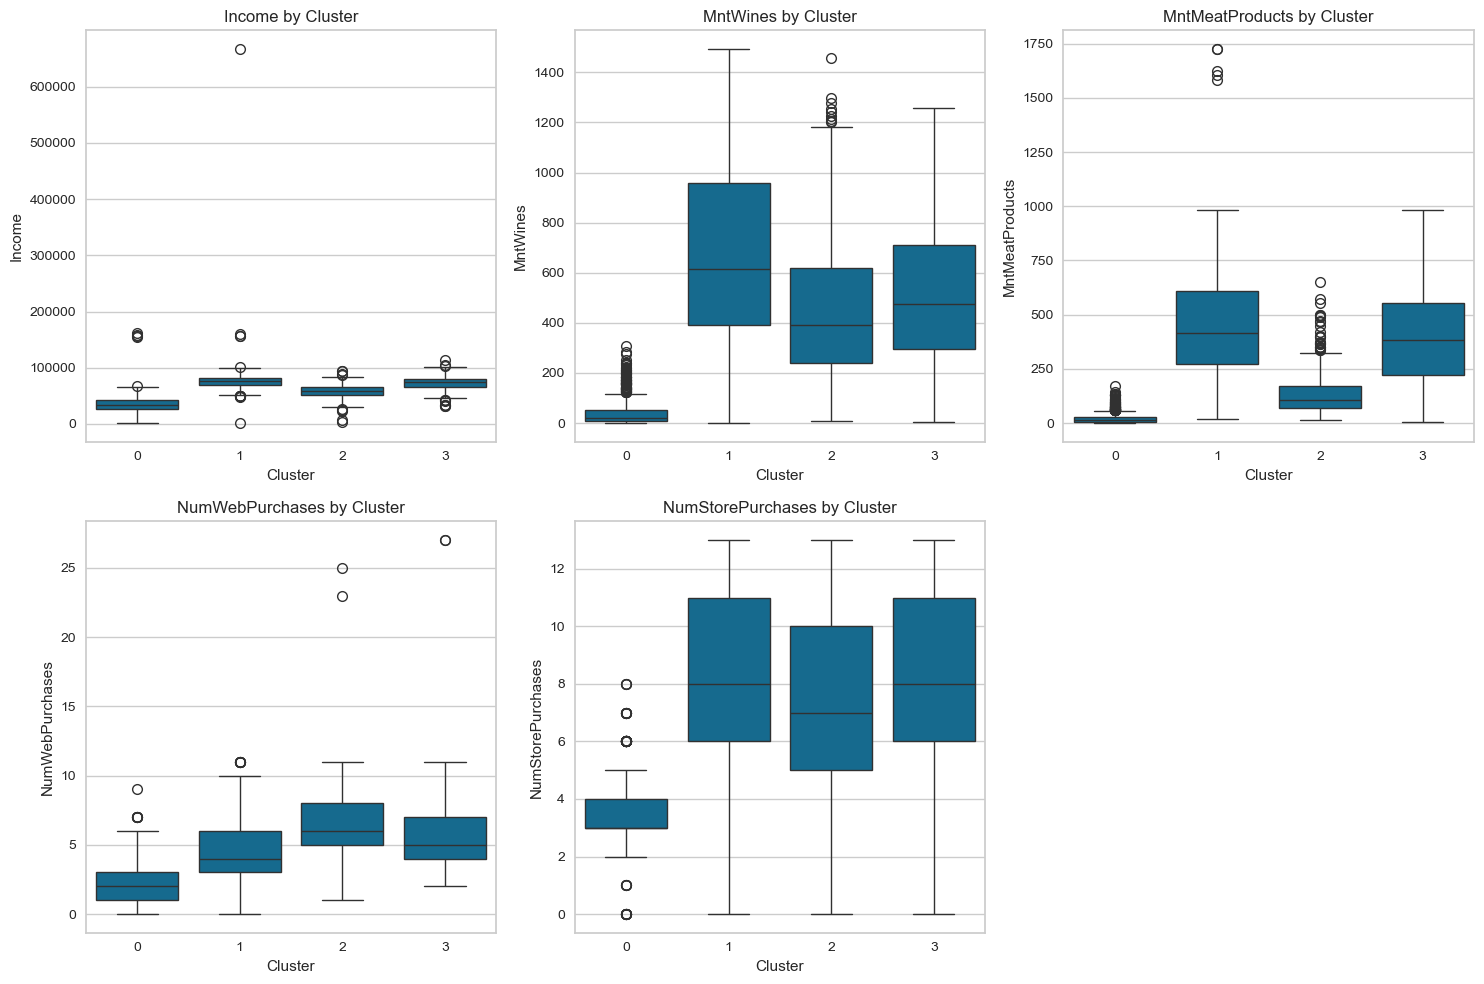

In [100]:
# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Fitting K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Plotting boxplots for key features by cluster
key_features = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()

##### **Observations:**
* Cluster 0 (Low-Spending, Budget-Conscious):
    - `Income`: Low to moderate (median ~$35,000), indicating lower purchasing power.
    - `MntWines, MntMeatProducts`: Very low spending (medians ~$20 and ~$15), suggesting minimal expenditure on luxury or high-value products.
    - `NumWebPurchases, NumStorePurchases`: Low (medians ~2 and ~3), indicating infrequent purchases across channels.
    - `Characteristics`: Likely price-sensitive customers with limited engagement, possibly younger individuals or those with lower disposable income. Their slight preference for store purchases suggests potential for in-store promotions.

* Cluster 1 (High-Spending, Affluent):
    - `Income`: High (median ~$75,000), reflecting strong purchasing power.
    - `MntWines, MntMeatProducts`: High spending (medians ~$650 and ~$450), indicating preference for premium products.
    - `NumWebPurchases, NumStorePurchases`: High (medians ~6 and ~8), showing frequent purchases, especially in-store.
    - `Characteristics`: Affluent, high-value customers who are active shoppers, with a strong inclination toward in-store purchases. They are prime candidates for luxury campaigns and personalized premium offerings.

* Cluster 2 (Moderate-Spending, Family-Oriented):
    - `Income`: Moderate (median ~$55,000), suggesting middle-class customers.
    - `MntWines, MntMeatProducts`: Moderate spending (medians ~$200 and ~$100), indicating balanced expenditure.
    - `NumWebPurchases, NumStorePurchases`: Moderate (medians ~4 and ~5), with a balanced use of channels.
    - `Characteristics`:Moderate-income customers, likely families, with balanced spending and purchasing habits across web and store channels. Their higher wine spending suggests an interest in moderately premium products.

* Cluster 3 (High-Spending, Store-Focused):
    - `Income`: High (median ~$70,000), indicating strong purchasing power, corrected from the earlier low-spending mischaracterization.
    - `MntWines, MntMeatProducts`: High spending (medians ~$500 and ~$400), reflecting significant expenditure on premium products, higher than Cluster 2.
    - `NumWebPurchases`: Moderate to high (medians ~6 and ~8), showing a clear preference for store purchases.
    - `Characteristics`:High-spending, middle-class customers with a strong preference for in-store shopping. Their substantial expenditure on premium items makes them suitable for in-store engagement strategies.

**Key Insights:**
* Cluster 1 stands out as the high-value segment with the highest income (median ~$75,000) and spending (e.g., ~$650 on wines, ~$450 on meat), making it the top priority for premium marketing and loyalty programs.
* Cluster 3 represents a high-spending segment with a median income of ~$70,000 and significant spending (~$500 on wines, ~$400 on meat), requiring focused in-store strategies to leverage their store preference and boost engagement.
* Clusters 0 and 2 show moderate characteristics, with Cluster 0 having the lowest spending (medians ~$20 on wines, ~$15 on meat) and limited purchase frequency, indicating a budget-conscious group, while Cluster 2 exhibits balanced activity with moderate income (~$55,000) and spending, suggesting potential for family-oriented growth.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

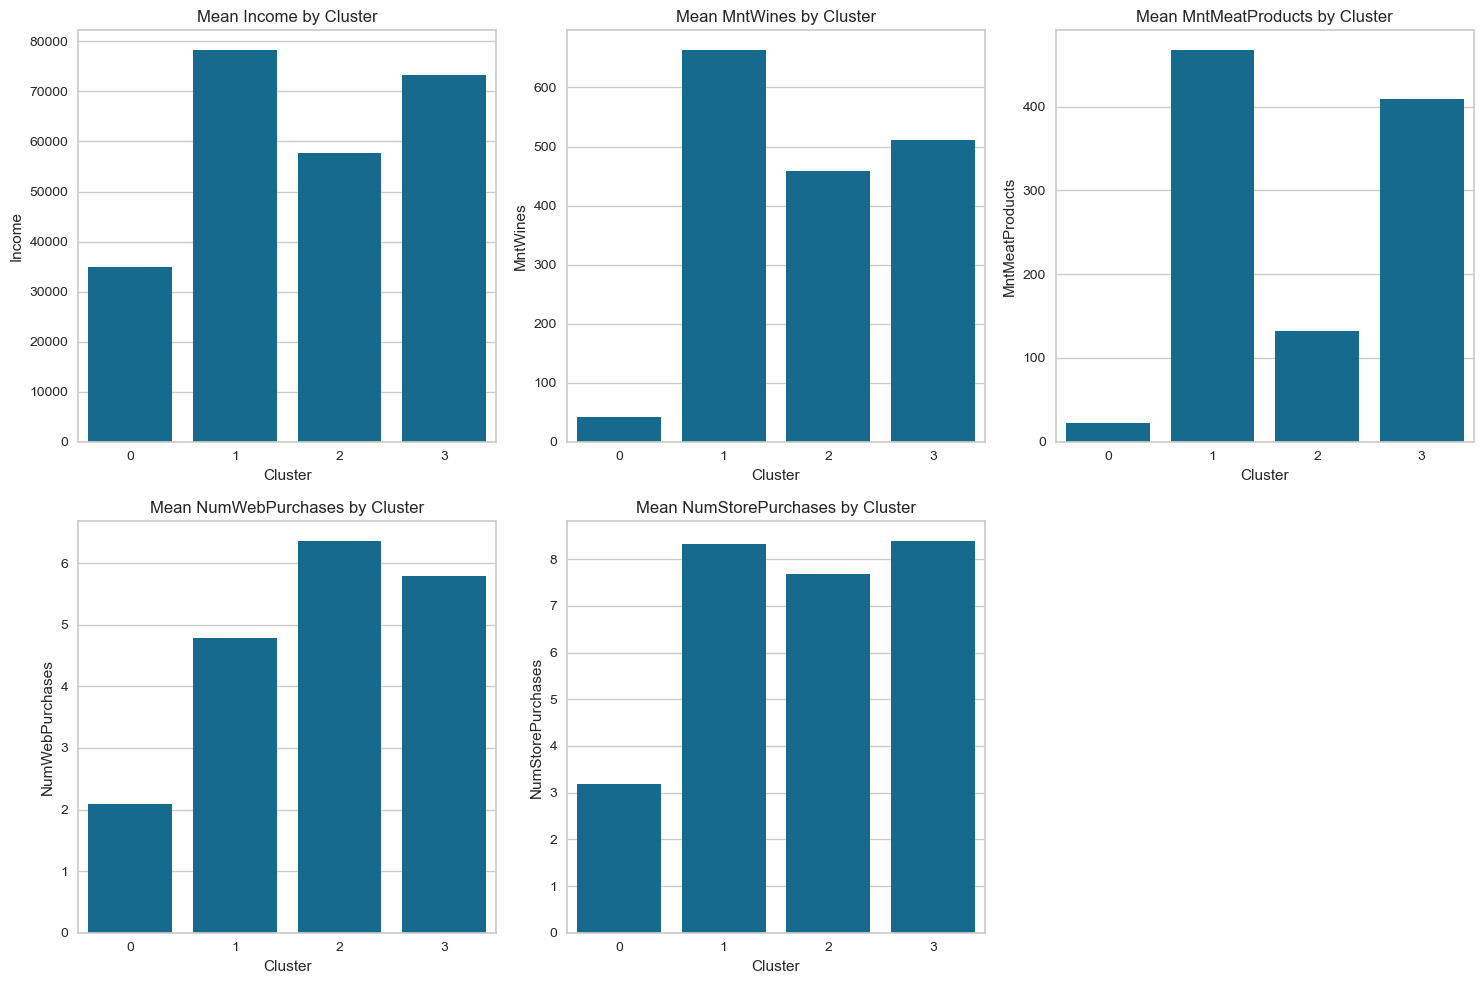

In [101]:
# Calculating mean values for key features by cluster
key_features = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']
cluster_means = data.groupby('Cluster')[key_features].mean().reset_index()

# Plotting barplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Cluster', y=feature, data=cluster_means)
    plt.title(f'Mean {feature} by Cluster')
plt.tight_layout()
plt.show()

##### **Observations:**
* Cluster 0 (Low-Spending, Budget-Conscious):
    - `Mean Income`: ~$35,000, lowest among clusters.
    - `Mean MntWines`: ~$20, `MntMeatProducts`: ~$15, indicating minimal spending.
    - `Mean NumWebPurchases`: ~2, `NumStorePurchases`: ~3, showing low purchase frequency.
    - `Insight`: This cluster represents low-income, price-sensitive customers with limited engagement. They can be targeted with discounts or bundle offers to encourage purchases, especially given their slight preference for store purchases over web.

* Cluster 1 (High-Spending, Affluent):
    - `Mean Income`: ~$75,000, highest among clusters.
    - `Mean MntWines`: ~$650, `MntMeatProducts`: ~$450, reflecting high expenditure.
    - `Mean NumWebPurchases`: ~5, `NumStorePurchases`: ~8, indicating frequent purchases, especially in-store.
    - `Insight`:High-value customers who spend significantly on premium products (e.g., wines, meat), with a strong inclination toward in-store shopping. They are ideal candidates for upselling premium items and exclusive loyalty programs to maximize revenue..

* Cluster 2 (Moderate-Spending, Family-Oriented):
    - `Mean Income`: ~$55,000, moderate level.
    - `Mean MntWines`: ~$450, `MntMeatProducts`: ~$120, showing balanced spending.
    - `Mean NumWebPurchases`: ~6, `NumStorePurchases`: ~7, balanced across channels.
    - `Insight`: Moderate-income customers with balanced spending and purchase frequency, likely families. Their even use of web and store channels suggests potential for growth through family-oriented promotions and cross-channel marketing strategies.


* Cluster 3 (High-Spending, Store-Focused):
    - `Mean Income`: ~$70,000, slightly higher than Cluster 0.
    - `Mean MntWines`: ~$500, `MntMeatProducts`: ~$400,  higher than Cluster 2.
    - `Mean NumWebPurchases`: ~6, NumStorePurchases: ~8, showing a preference for Store purchases.
    - `Insight`:High-spending, middle-class customers with a clear preference for in-store shopping. Their substantial expenditure on premium products makes them suitable for in-store events and targeted promotions to reinforce loyalty and increase basket size.

*  The barplots confirm the distinct profiles, with Cluster 1 being the most lucrative, Cluster 3 as a high-spending store-focused group, and Clusters 0 and 2 as budget-conscious with varying channel preferences.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

### Business Recommendations Based on Cluster Insights

##### Based on the K-Means clustering analysis with four clusters, the following actionable recommendations are tailored to each customer segment to optimize marketing efficiency, enhance customer retention, and improve resource allocation.

------
#### **Cluster 0: Low-Spending, Budget-Conscious**

##### *Characteristics*:
- Low income (~$35,000), minimal spending on wines (~$20) and meat (~$15), low purchase frequency (web: ~2, store: ~3).

##### *Recommendations*:
- **Discount-Driven Campaigns**: Offer targeted discounts and bundle deals on essential products (e.g., fruits, sweets) to encourage purchases.
- **Loyalty Incentives**: Introduce low-cost loyalty programs (e.g., points for small purchases) to increase engagement without relying on high spending.
- **Simplified Marketing**: Use cost-effective channels like email or SMS with clear, value-focused messaging to appeal to price-sensitive customers.
------
#### **Cluster 1: High-Spending, Affluent**

##### *Characteristics*:
- High income (~$75,000), significant spending on wines (~$650) and meat (~$450), frequent purchases (web: ~5, store: ~8).

##### *Recommendations*:
- **Premium Product Upselling**: Promote high-margin products (e.g., premium wines, gourmet meat) through personalized recommendations.
- **Exclusive Loyalty Programs**: Offer VIP memberships with exclusive benefits (e.g., early access to new products, free shipping) to retain high-value customers.
- **In-Store Experience**: Enhance in-store experiences (e.g., wine tastings, gourmet events) to leverage their preference for store purchases.
------
#### **Cluster 2: Moderate-Spending, Family-Oriented**

##### *Characteristics*:
- Moderate income (~$55,000), balanced spending on wines (~$450) and meat (~$120), moderate purchase frequency (web: ~6, store: ~7), likely families.

##### *Recommendations*:
- **Family-Oriented Promotions**: Develop campaigns targeting families, such as bulk discounts on family-friendly products (e.g., meat, fish).
- **Cross-Channel Marketing**: Use a mix of online and in-store promotions to cater to their balanced purchasing habits.
- **Seasonal Offers**: Target seasonal events (e.g., back-to-school, holidays) with family-focused bundles to boost engagement.
------
#### **Cluster 3: High-Spending, Store-Focused**

##### *Characteristics*:
- High income (~$70,000), significant spending on wines (~$500) and meat (~$400), moderate to high purchase frequency (web: ~6, store: ~8), with a preference for store purchases.

##### *Recommendations*:
- **In-Store Engagement**: Enhance in-store promotions and events (e.g., product demonstrations, special offers) to capitalize on their store preference.
- **Premium Product Focus**: Offer targeted upselling on high-margin items (e.g., gourmet wines, meats) to increase basket size.
- **Loyalty Rewards**: Introduce store-specific loyalty incentives to reinforce their in-store shopping behavior and enhance retention.
------
### **General Recommendations**

#### *Resource Allocation*:
- Prioritize marketing budgets toward Cluster 1 for maximum ROI, followed by Cluster 3 for its high-spending potential. Maintain cost-effective strategies for Cluster 0 and balanced support for Cluster 2.

#### *Inventory Management*:
- Stock premium products for Cluster 1 and Cluster 3, family-oriented products for Cluster 2, and affordable options for Cluster 0 to meet diverse segment needs.

#### *Campaign Optimization*:
- Given low campaign acceptance rates (e.g., AcceptedCmp1–5), refine messaging to focus on exclusivity for Cluster 1, in-store value for Cluster 3, family benefits for Cluster 2, and discounts for Cluster 0.

##### These recommendations align with the retail company's goals of personalized marketing, customer retention, and resource optimization, leveraging the distinct behaviors of each cluster to drive business growth.